<a href="https://colab.research.google.com/github/jadamccallum/springboard/blob/main/DeepChurn_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas openpyxl scikit-learn matplotlib seaborn

In [3]:
import kagglehub

In [4]:
path = kagglehub.dataset_download("uttamp/store-data")
print("Path to dataset files:", path)

100%|██████████| 2.57M/2.57M [00:00<00:00, 3.07MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uttamp/store-data/versions/1


In [5]:
import os
path = "/root/.cache/kagglehub/datasets/uttamp/store-data/versions/1"
print("Files in path:")
print(os.listdir(path))

Files in path:
['storedata_total.xlsx']


In [6]:
import pandas as pd
file_path = os.path.join(path, "storedata_total.xlsx")
df = pd.read_excel(file_path)

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [7]:
csv_path = "/content/storedata_total.xlsx.csv"
df.to_csv(csv_path, index=False)
print(f"CSV saved to: {csv_path}")

CSV saved to: /content/storedata_total.xlsx.csv


In [8]:
print(df.head())

   custid  retained    created           firstorder            lastorder  \
0  6H6T6N         0 2012-09-28  2013-08-11 00:00:00  2013-08-11 00:00:00   
1  APCENR         1 2010-12-19  2011-04-01 00:00:00  2014-01-19 00:00:00   
2  7UP6MS         0 2010-10-03  2010-12-01 00:00:00  2011-07-06 00:00:00   
3  7ZEW8G         0 2010-10-22  2011-03-28 00:00:00  2011-03-28 00:00:00   
4  8V726M         1 2010-11-27  2010-11-29 00:00:00  2013-01-28 00:00:00   

   esent   eopenrate  eclickrate  avgorder   ordfreq  paperless  refill  \
0     29  100.000000    3.448276     14.52  0.000000          0       0   
1     95   92.631579   10.526316     83.69  0.181641          1       1   
2      0    0.000000    0.000000     33.58  0.059908          0       0   
3      0    0.000000    0.000000     54.96  0.000000          0       0   
4     30   90.000000   13.333333    111.91  0.008850          0       0   

   doorstep     favday city  
0         0     Monday  DEL  
1         1     Friday  DEL  
2 

In [9]:
print(df.info())
print(df.describe())
print(df['retained'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30801 entries, 0 to 30800
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   custid      30781 non-null  object        
 1   retained    30801 non-null  int64         
 2   created     30781 non-null  datetime64[ns]
 3   firstorder  30781 non-null  object        
 4   lastorder   30781 non-null  object        
 5   esent       30801 non-null  int64         
 6   eopenrate   30801 non-null  float64       
 7   eclickrate  30801 non-null  float64       
 8   avgorder    30801 non-null  float64       
 9   ordfreq     30801 non-null  float64       
 10  paperless   30801 non-null  int64         
 11  refill      30801 non-null  int64         
 12  doorstep    30801 non-null  int64         
 13  favday      30801 non-null  object        
 14  city        30801 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 3.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-11-da8b09998316>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Churned", "Retained"], fontsize=12)


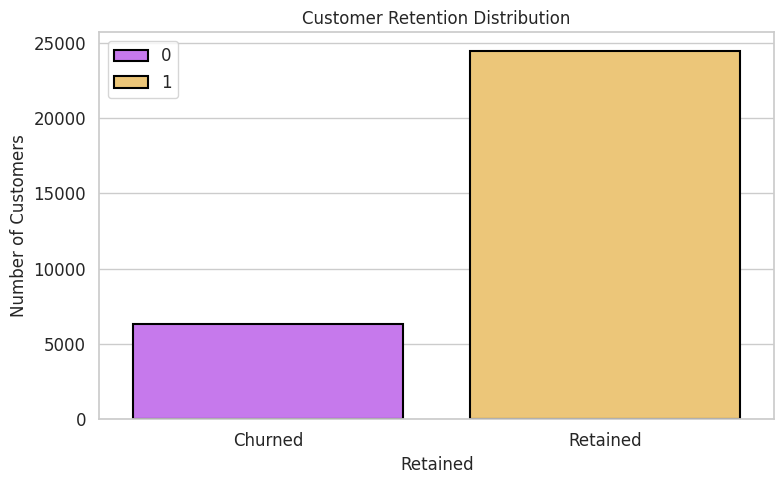

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
palette = {0: "#cc66ff", 1: "#ffcc66"}
ax = sns.countplot(
    data=df,
    x='retained',
     hue='retained',
    palette=palette,
    edgecolor="black",
    linewidth=1.5)
ax.set(title="Customer Retention Distribution", xlabel="Retained", ylabel="Number of Customers")
ax.set_xticklabels(["Churned", "Retained"], fontsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [12]:
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

Missing values:
 custid        20
created       20
firstorder    20
lastorder     20
dtype: int64


In [13]:
df = df.dropna()

In [14]:
cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", cat_cols)

Categorical columns: Index(['custid', 'firstorder', 'lastorder', 'favday', 'city'], dtype='object')


In [15]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [16]:
print(df.columns)

Index(['retained', 'created', 'esent', 'eopenrate', 'eclickrate', 'avgorder',
       'ordfreq', 'paperless', 'refill', 'doorstep',
       ...
       'lastorder_2017-12-25 00:00:00', 'favday_Monday', 'favday_Saturday',
       'favday_Sunday', 'favday_Thursday', 'favday_Tuesday',
       'favday_Wednesday', 'city_BOM', 'city_DEL', 'city_MAA'],
      dtype='object', length=35871)


Total Average Spend

In [17]:
if 'avgorder' in df.columns and 'ordfreq' in df.columns:
    df['total_spend'] = df['avgorder'] * df['ordfreq']
print("Total Spend Feature:")
print(df[['avgorder', 'ordfreq', 'total_spend']].head())

Total Spend Feature:
   avgorder   ordfreq  total_spend
0     14.52  0.000000     0.000000
1     83.69  0.181641    15.201504
2     33.58  0.059908     2.011705
3     54.96  0.000000     0.000000
4    111.91  0.008850     0.990354


Customer's Fvorite Day

In [18]:
df['favorite_day'] = df[['favday_Monday', 'favday_Saturday', 'favday_Sunday',
                         'favday_Thursday', 'favday_Tuesday', 'favday_Wednesday']].fillna(False).idxmax(axis=1)
df['favorite_day'] = df['favorite_day'].apply(lambda x: x if x != 'favday_Monday' else 'No Preference')
df['favorite_day'] = df[['favday_Monday', 'favday_Saturday', 'favday_Sunday',
                         'favday_Thursday', 'favday_Tuesday', 'favday_Wednesday']].apply(lambda row: 'No Preference' if row.sum() == 0 else row.idxmax(), axis=1)

print("\nFavorite Day Feature (with handling for 'No Preference'):")
print(df[['favday_Monday', 'favday_Saturday', 'favday_Sunday',
          'favday_Thursday', 'favday_Tuesday', 'favday_Wednesday', 'favorite_day']].head())


Favorite Day Feature (with handling for 'No Preference'):
   favday_Monday  favday_Saturday  favday_Sunday  favday_Thursday  \
0           True            False          False            False   
1          False            False          False            False   
2          False            False          False            False   
3          False            False          False             True   
4           True            False          False            False   

   favday_Tuesday  favday_Wednesday      favorite_day  
0           False             False     favday_Monday  
1           False             False     No Preference  
2           False              True  favday_Wednesday  
3           False             False   favday_Thursday  
4           False             False     favday_Monday  


Paperless and Refill Preferences

In [19]:
df['paperless_refill'] = df['paperless'] & df['refill']
df['paperless_only'] = df['paperless'] & ~df['refill']
df['refill_only'] = ~df['paperless'] & df['refill']
print("Paperless & Refill Features")
print(df[['paperless', 'refill', 'paperless_refill', 'paperless_only', 'refill_only']].head())

Paperless & Refill Features
   paperless  refill  paperless_refill  paperless_only  refill_only
0          0       0                 0               0            0
1          1       1                 1               0            0
2          0       0                 0               0            0
3          0       0                 0               0            0
4          0       0                 0               0            0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_curve

In [21]:
X = df.drop('retained', axis=1)
y = df['retained']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [23]:
datetime_columns = X_train.select_dtypes(include=['datetime']).columns
print("Datetime columns:", datetime_columns)

Datetime columns: Index(['created'], dtype='object')


In [24]:
for col in datetime_columns:
    X_train[col + '_year'] = X_train[col].dt.year
    X_train[col + '_month'] = X_train[col].dt.month
    X_train[col + '_day'] = X_train[col].dt.day
    X_train[col + '_weekday'] = X_train[col].dt.weekday
    X_train[col + '_hour'] = X_train[col].dt.hour
    X_train[col + '_minute'] = X_train[col].dt.minute
    X_train[col + '_second'] = X_train[col].dt.second

In [25]:
if col in X_train.columns:
   X_train = X_train.drop(columns=[col])
print(X_train.head())

       esent   eopenrate  eclickrate  avgorder   ordfreq  paperless  refill  \
11111     45   20.000000    0.000000     94.24  0.125000          0       0   
15107     45   26.666667    4.444444     31.01  0.000000          1       0   
2234      49  100.000000   28.571429     67.64  0.142716          1       1   
9866      36    0.000000    0.000000     49.02  0.000000          1       0   
30604      9   66.666667   11.111111     29.00  0.000000          1       0   

       doorstep  custid_278734  custid_869576  ...  paperless_refill  \
11111         0          False          False  ...                 0   
15107         0          False          False  ...                 0   
2234          0          False          False  ...                 1   
9866          0          False          False  ...                 0   
30604         0          False          False  ...                 0   

       paperless_only  refill_only  created_year  created_month  created_day  \
11111       

In [26]:
X_train = pd.get_dummies(X_train, drop_first=True)
print(X_train.head())

       esent   eopenrate  eclickrate  avgorder   ordfreq  paperless  refill  \
11111     45   20.000000    0.000000     94.24  0.125000          0       0   
15107     45   26.666667    4.444444     31.01  0.000000          1       0   
2234      49  100.000000   28.571429     67.64  0.142716          1       1   
9866      36    0.000000    0.000000     49.02  0.000000          1       0   
30604      9   66.666667   11.111111     29.00  0.000000          1       0   

       doorstep  custid_278734  custid_869576  ...  created_weekday  \
11111         0          False          False  ...                1   
15107         0          False          False  ...                5   
2234          0          False          False  ...                2   
9866          0          False          False  ...                1   
30604         0          False          False  ...                6   

       created_hour  created_minute  created_second  \
11111             0               0        

In [27]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
df['created'] = pd.to_datetime(df['created'], errors='coerce')

In [29]:
print(df['created'].isnull().sum())
print(df['created'].head())

0
0   2012-09-28
1   2010-12-19
2   2010-10-03
3   2010-10-22
4   2010-11-27
Name: created, dtype: datetime64[ns]


In [30]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
print(X_train.columns)

Index(['esent', 'eopenrate', 'eclickrate', 'avgorder', 'ordfreq', 'paperless',
       'refill', 'doorstep', 'custid_278734', 'custid_869576',
       ...
       'created_weekday', 'created_hour', 'created_minute', 'created_second',
       'favorite_day_favday_Monday', 'favorite_day_favday_Saturday',
       'favorite_day_favday_Sunday', 'favorite_day_favday_Thursday',
       'favorite_day_favday_Tuesday', 'favorite_day_favday_Wednesday'],
      dtype='object', length=35886)


In [32]:
df['created_weekday'] = df['created'].dt.day
df['created_hour'] = df['created'].dt.hour
df['created_minute'] = df['created'].dt.minute
df['created_month'] = df['created'].dt.month
df['created_second'] = df['created'].dt.second

In [33]:
X_test['created_weekday'] = pd.to_datetime(X_test['created']).dt.day
X_test['created_hour'] = pd.to_datetime(X_test['created']).dt.hour

In [34]:
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

In [35]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

In [37]:
auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC Score: {auc:.4f}")
print(classification_report(y_test, y_pred))

AUC-ROC Score: 0.9554
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      1265
           1       0.95      1.00      0.97      4892

    accuracy                           0.95      6157
   macro avg       0.97      0.89      0.92      6157
weighted avg       0.96      0.95      0.95      6157



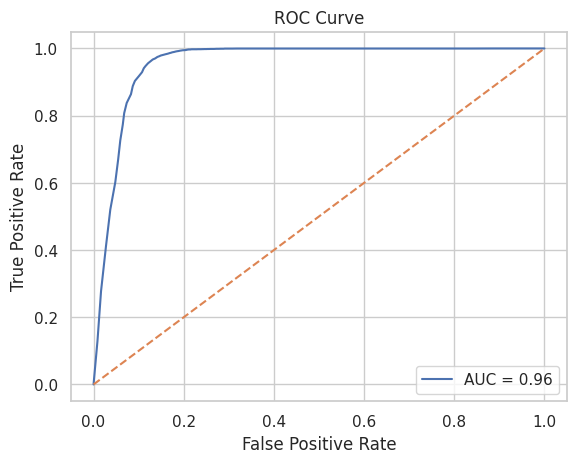

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
from google.colab import files
files.download("storedata_total.xlsx.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
import subprocess
import sys
subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas", "openpyxl", "scikit-learn", "matplotlib", "seaborn"])

0